In [1]:
# %matplotlib inline

from __future__ import print_function
from sklearn import preprocessing
from time import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import sklearn.decomposition
import sklearn.metrics
from sklearn import gaussian_process
from sklearn import cross_validation
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.random.seed(1234)

In [3]:
#load 2015 and 2016 data into train and test data set 
horseData2015 = np.array(pd.read_excel('HorseCTrain.xlsx').values)
horseData2015 = np.vstack({tuple(row) for row in horseData2015})

horseData2016 = np.array(pd.read_excel('HorseCTest.xlsx').values)
horseData2016 = np.vstack({tuple(row) for row in horseData2016})

x_train = horseData2015[:, :-1];
y_train = horseData2015[:, -1:horseData2015[0].size];

x_test = horseData2016[:, :-1];
y_test = horseData2016[:, -1:horseData2016[0].size];

#smoooth y for both training and testing data
y_train = y_train.reshape(len(y_train),).astype(int) + (np.random.random_sample((len(y_train),))-1) + np.random.random_sample((len(y_train),))
y_test = y_test.reshape(len(y_test),).astype(int) + (np.random.random_sample((len(y_test),))-1) + np.random.random_sample((len(y_test),))

#smooth x_train for grid_search
X_train_smooth = preprocessing.scale(x_train)

In [4]:
param_grid = {"theta0": [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
              "nugget": [0.01, 0.02, 0.03]}

clf = gaussian_process.GaussianProcess(regr="constant", corr="absolute_exponential")

# print(clf.get_params().keys())
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X_train_smooth, y_train)

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

report(grid_search.cv_results_)

GridSearchCV took 0.54 seconds for 24 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.776 (std: 0.037)
Parameters: {'nugget': 0.02, 'theta0': 0.005}

Model with rank: 2
Mean validation score: 0.774 (std: 0.033)
Parameters: {'nugget': 0.03, 'theta0': 0.01}

Model with rank: 3
Mean validation score: 0.774 (std: 0.039)
Parameters: {'nugget': 0.03, 'theta0': 0.005}



In [5]:
theta = 0.01
nugget = 0.025
trainX = x_train
trainY = y_train
testX = x_test
testY = y_test
testSet = x_test
title = 'Highest Speed Figure'

gp = gaussian_process.GaussianProcess(regr="constant", corr="absolute_exponential",theta0=theta, nugget =nugget)
gp.fit(trainX, trainY)

predictedY, MSE = gp.predict(testX, eval_MSE = True)
sigma = np.sqrt(MSE)

results = {}
results['predictedY'] = predictedY
results['sigma'] = sigma

print ("Train score R2:", gp.score(trainX, trainY))
print ("Test score R2:", sklearn.metrics.r2_score(testY, predictedY))

Train score R2: 0.969671715792
Test score R2: 0.833138696062


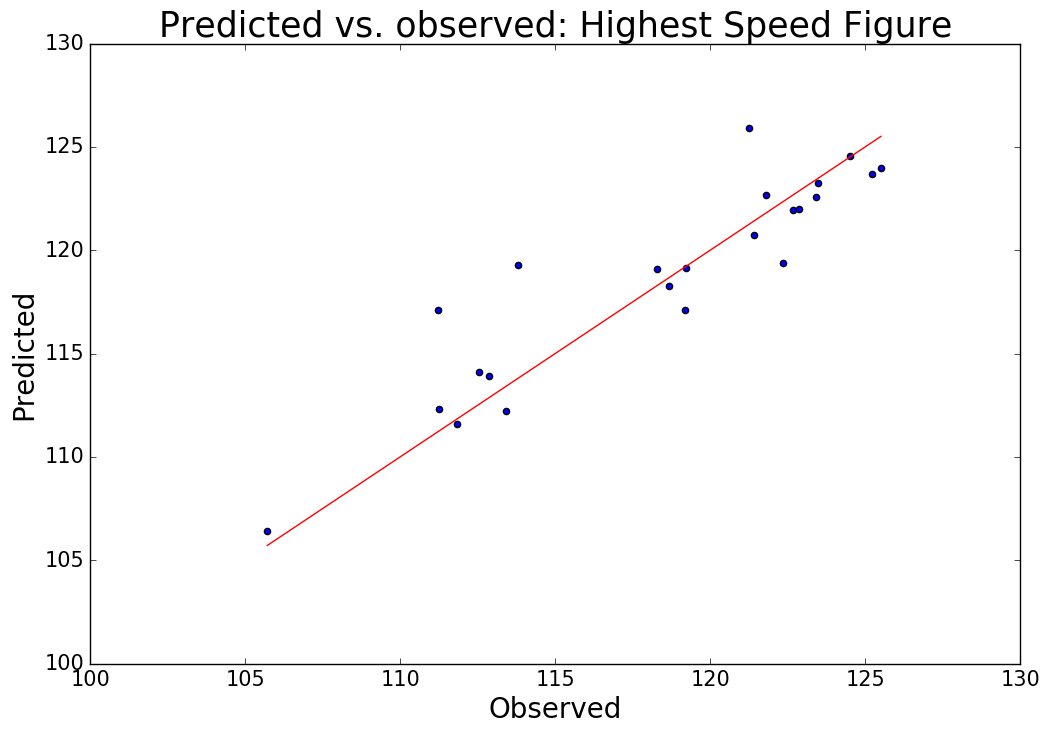

In [6]:
plt.figure(figsize = (12,8))
plt.scatter(testY, predictedY)
plt.plot([min(testY), max(testY)], [min(testY), max(testY)], 'r')
plt.xlim(100, 130)
plt.ylim(100, 130)
plt.title('Predicted vs. observed: ' + title, fontsize=25)
plt.xlabel('Observed', fontsize=20)
plt.ylabel('Predicted', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [7]:
plt.savefig('results.png', bbox_inches='tight', transparent=True)

In [8]:
def calculateError(predict, actual) :
    total =0.0
    for i in range(len(predict)):
        total += predict[i] - actual[i]
    return total/len(predict)
            
err = calculateError(results['predictedY'],y_test)
print(err)

0.375391135178


[ 120.60171871  118.68401924  118.09417418  120.01601367  121.75428272
  119.90399535  119.0096174   116.76694182  119.83599226  117.53046553
  122.97593119  116.20972654  115.14674639]
Test score R2: -2.52897548857


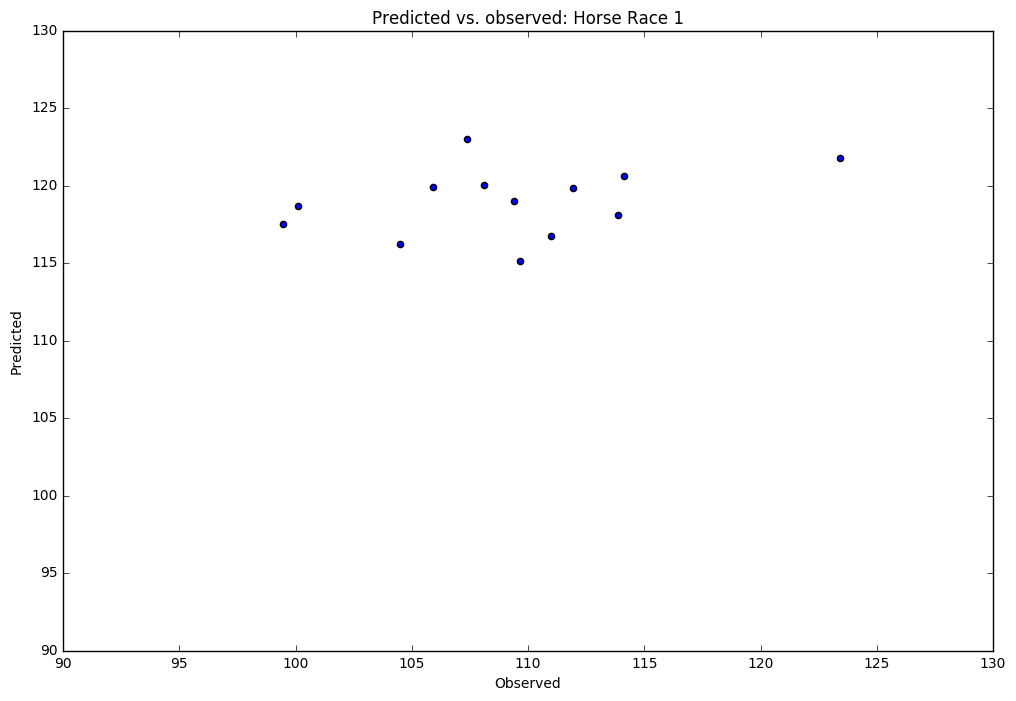

In [9]:

horseRace1 = np.array(pd.read_excel('HorseRace1.xlsx').values)
horseRace1 = np.vstack({tuple(row) for row in horseRace1})

x_hr1 = horseRace1[:, :-1];
y_hr1 = horseRace1[:, -1:horseRace1[0].size];
y_hr1 = y_hr1.reshape(len(y_hr1),).astype(int) + (np.random.random_sample((len(y_hr1),))-1) + np.random.random_sample((len(y_hr1),))

def predictTop3Horse(x_hr1 , y_hr1, title) :
    predictedY, MSE = gp.predict(x_hr1, eval_MSE = True)
    sigma = np.sqrt(MSE)

    results = {}
    results['predictedY'] = predictedY
    results['sigma'] = sigma
    
    print(predictedY)

    print ("Test score R2:", sklearn.metrics.r2_score(y_hr1, predictedY))

    plt.figure(figsize = (12,8))
    plt.scatter(y_hr1, predictedY)
    #plt.plot([min(testY), max(testY)], [min(testY), max(testY)], 'r')
    plt.xlim(90, 130)
    plt.ylim(90, 130)
    #     plt.xlim([min(testY)[0], max(testY)[0]])
    #     plt.ylim([min(testY)[0], max(testY)[0]])
    plt.title('Predicted vs. observed: ' + title)
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()
    
predictTop3Horse(x_hr1, y_hr1, "Horse Race 1")
